# CLASIFICACIÓN MULTICLASE, ÁRBOLES DE DECISIÓN Y VALIDACIÓN CRUZADA

## Carga de Datos

In [1]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

#cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

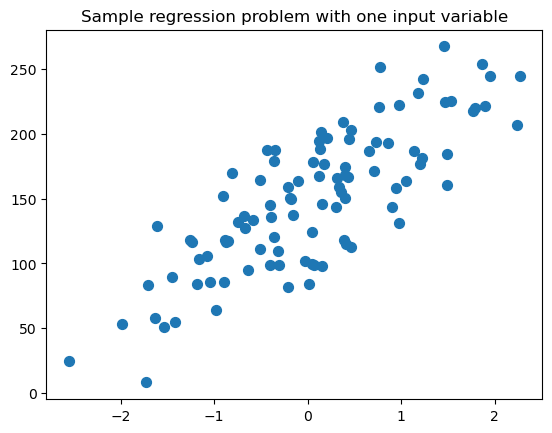

In [3]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

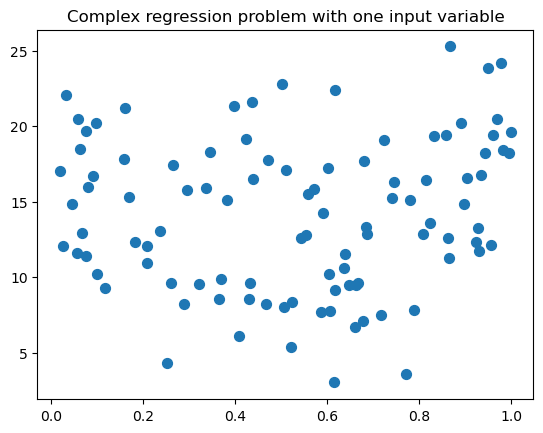

In [4]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

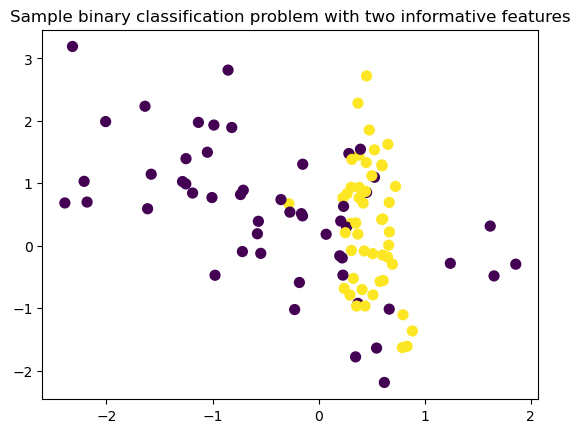

In [5]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()

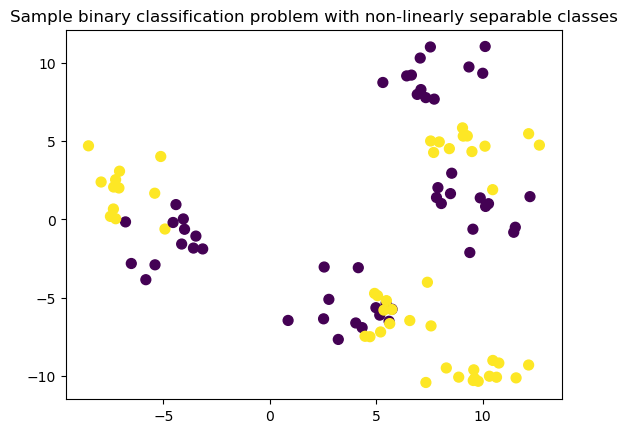

In [6]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

In [7]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

## Validacion Cruzada

### Ejemplo con k-NN con el dataset de frutas (solo 2 features)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=10)

knn=KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))


0.5333333333333333
0.6136363636363636


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Initialize lists to store scores
test_scores = []
train_scores = []

# Loop through 10 different random states
for i in range(10):
    # Split the data with different random states
    X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=i)
    
    # Create and fit the model
    knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
    
    # Store the scores
    test_scores.append(knn.score(X_test, y_test))
    train_scores.append(knn.score(X_train, y_train))
    
    print(f"Random State {i}:")
    print(f"Test Score: {test_scores[-1]:.3f}")
    print(f"Train Score: {train_scores[-1]:.3f}")
    print("-" * 30)

# Print summary statistics
print("\nSummary Statistics:")
print(f"Average Test Score: {np.mean(test_scores):.3f} ± {np.std(test_scores):.3f}")
print(f"Average Train Score: {np.mean(train_scores):.3f} ± {np.std(train_scores):.3f}")

Random State 0:
Test Score: 0.333
Train Score: 0.591
------------------------------
Random State 1:
Test Score: 0.400
Train Score: 0.591
------------------------------
Random State 2:
Test Score: 0.600
Train Score: 0.705
------------------------------
Random State 3:
Test Score: 0.467
Train Score: 0.659
------------------------------
Random State 4:
Test Score: 0.533
Train Score: 0.614
------------------------------
Random State 5:
Test Score: 0.667
Train Score: 0.591
------------------------------
Random State 6:
Test Score: 0.267
Train Score: 0.727
------------------------------
Random State 7:
Test Score: 0.400
Train Score: 0.727
------------------------------
Random State 8:
Test Score: 0.600
Train Score: 0.773
------------------------------
Random State 9:
Test Score: 0.600
Train Score: 0.636
------------------------------

Summary Statistics:
Average Test Score: 0.487 ± 0.127
Average Train Score: 0.661 ± 0.064


In [10]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y)

# cv_scores = cross_val_score(clf, X, y, cv=5,3,30 para error)

print('Cross-validation scores (fold):', cv_scores)
print('Mean cross-validation score (fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (fold): [0.75 0.75 0.83 0.83 0.82]
Mean cross-validation score (fold): 0.797


In [11]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y, cv=3)

#cv_scores = cross_val_score(clf, X, y, cv=10)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.8  0.75 0.84]
Mean cross-validation score (3-fold): 0.797


## Árboles de Decisión

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

In [13]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({
    0: iris.target_names[0],
    1: iris.target_names[1],
    2: iris.target_names[2]
})

# Basic dataset information
print("Dataset Overview:")
print("-" * 50)
print("\nShape:", df.shape)
print("\nFeatures:", iris.feature_names)
print("\nTarget Classes:", iris.target_names)
print("\nBasic Statistics:")
print(df.describe().round(2))

# Class distribution
print("\nClass Distribution:")
print(df['species'].value_counts())

Dataset Overview:
--------------------------------------------------

Shape: (150, 6)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Classes: ['setosa' 'versicolor' 'virginica']

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  target  
count            150.00  150.00  
mean               1.20    1.00  
std                0.76    0.82  
min                0.10   

In [14]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 14)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


In [16]:
# Obtenemos la profundidad del árbol
clf.get_depth()

5

### Establecer la profundidad máxima del árbol de decisión para ayudar a evitar el sobreajuste

In [17]:
clf2 = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.97


### Visualización

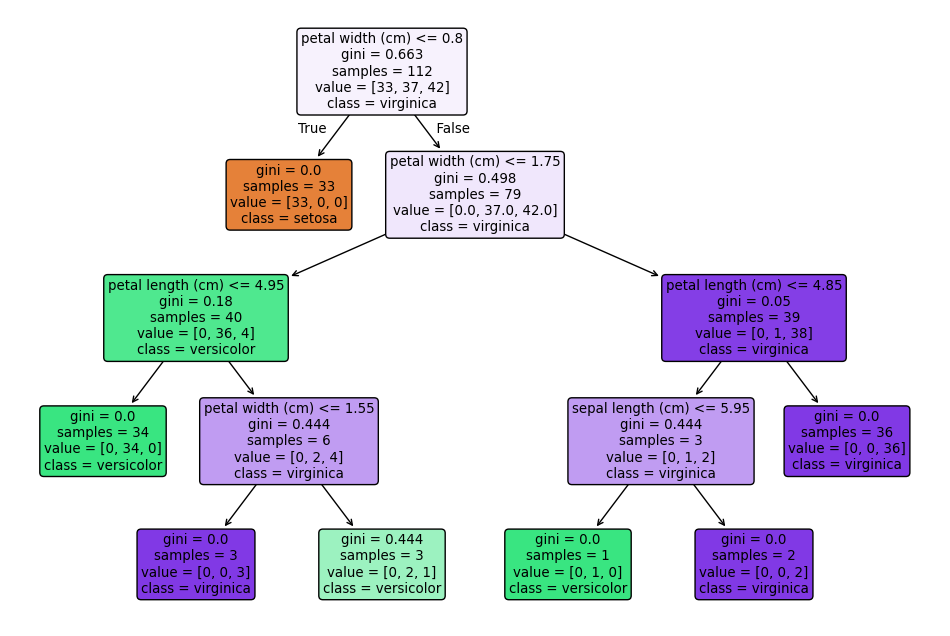

In [18]:
# Graficamos el árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plt.title('Decision Tree Classifier (max_depth=4)')
plot_tree(clf2, filled=True, feature_names=iris.feature_names,
           class_names=iris.target_names, rounded=True)
plt.show()
#plot_decision_tree(clf, iris.feature_names, iris.target_names)

### Pre-pruned version (max_depth = 3)

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.97


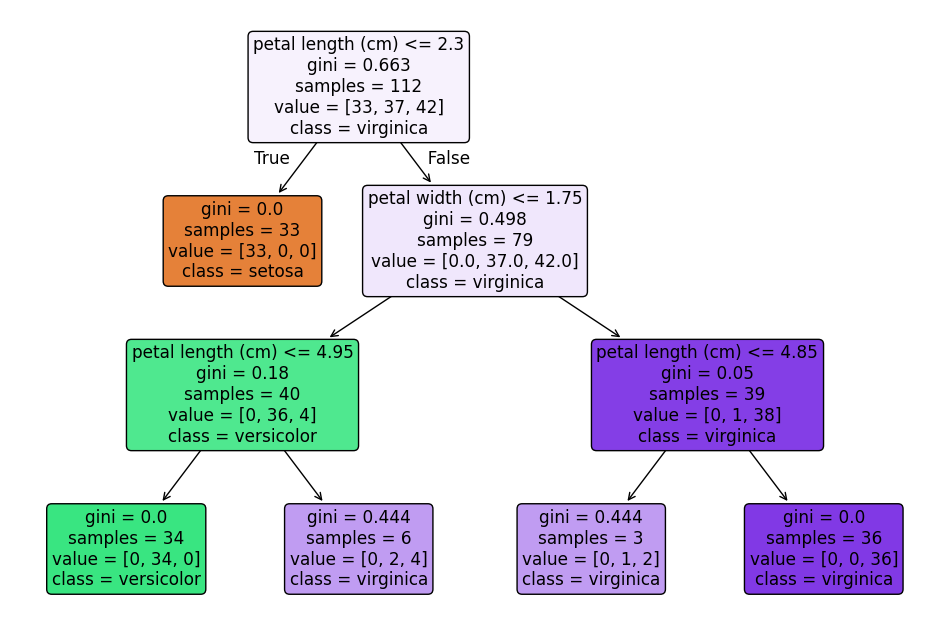

In [19]:
clf3 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf3.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf3.score(X_test, y_test)))
# Graficamos el árbol de decisión
plt.figure(figsize=(12, 8))
plt.title('Decision Tree Classifier (max_depth=3)')
plot_tree(clf3, filled=True, feature_names=iris.feature_names,
           class_names=iris.target_names, rounded=True)
plt.show()

### Pre-pruned version (max_depth = 2)

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.97


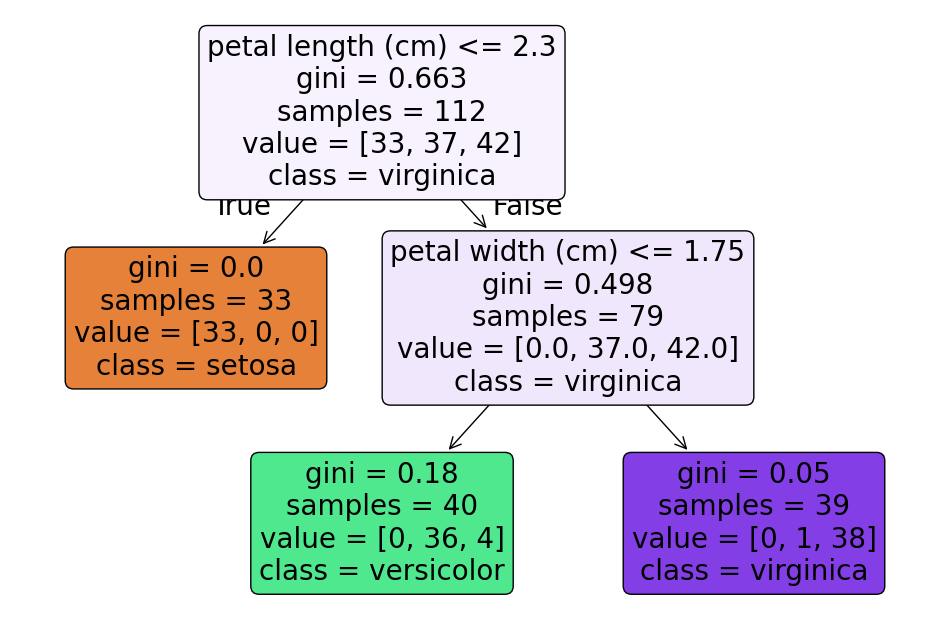

In [20]:
clf4 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf4.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf4.score(X_test, y_test)))
# Graficamos el árbol de decisión
plt.figure(figsize=(12, 8))
plt.title('Decision Tree Classifier (max_depth=3)')
plot_tree(clf4, filled=True, feature_names=iris.feature_names,
           class_names=iris.target_names, rounded=True)
plt.show()

### Feature importance

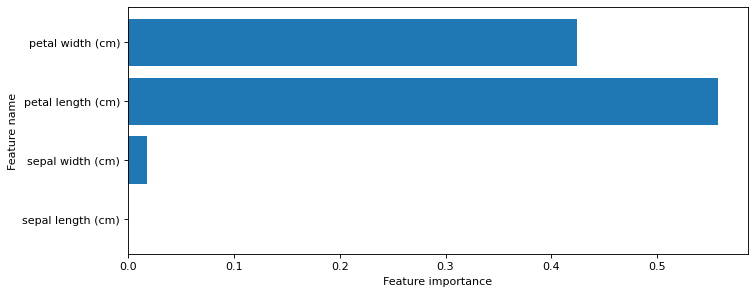

Feature importances: [0.   0.02 0.56 0.42]


In [21]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

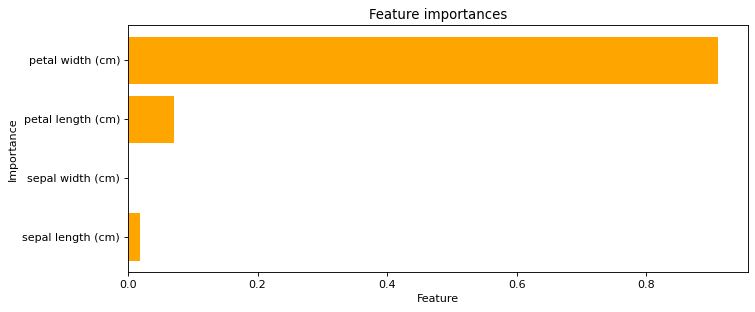

[0.02 0.   0.07 0.91]


In [ ]:
# Gráficamos ahora la importancia de las características de clf2
plt.figure(figsize=(10,4), dpi=80)
# Hacemos un gráfico de barras
plt.barh(iris.feature_names, clf2.feature_importances_, color = 'orange')
plt.title('Feature importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
print(clf2.feature_importances_)

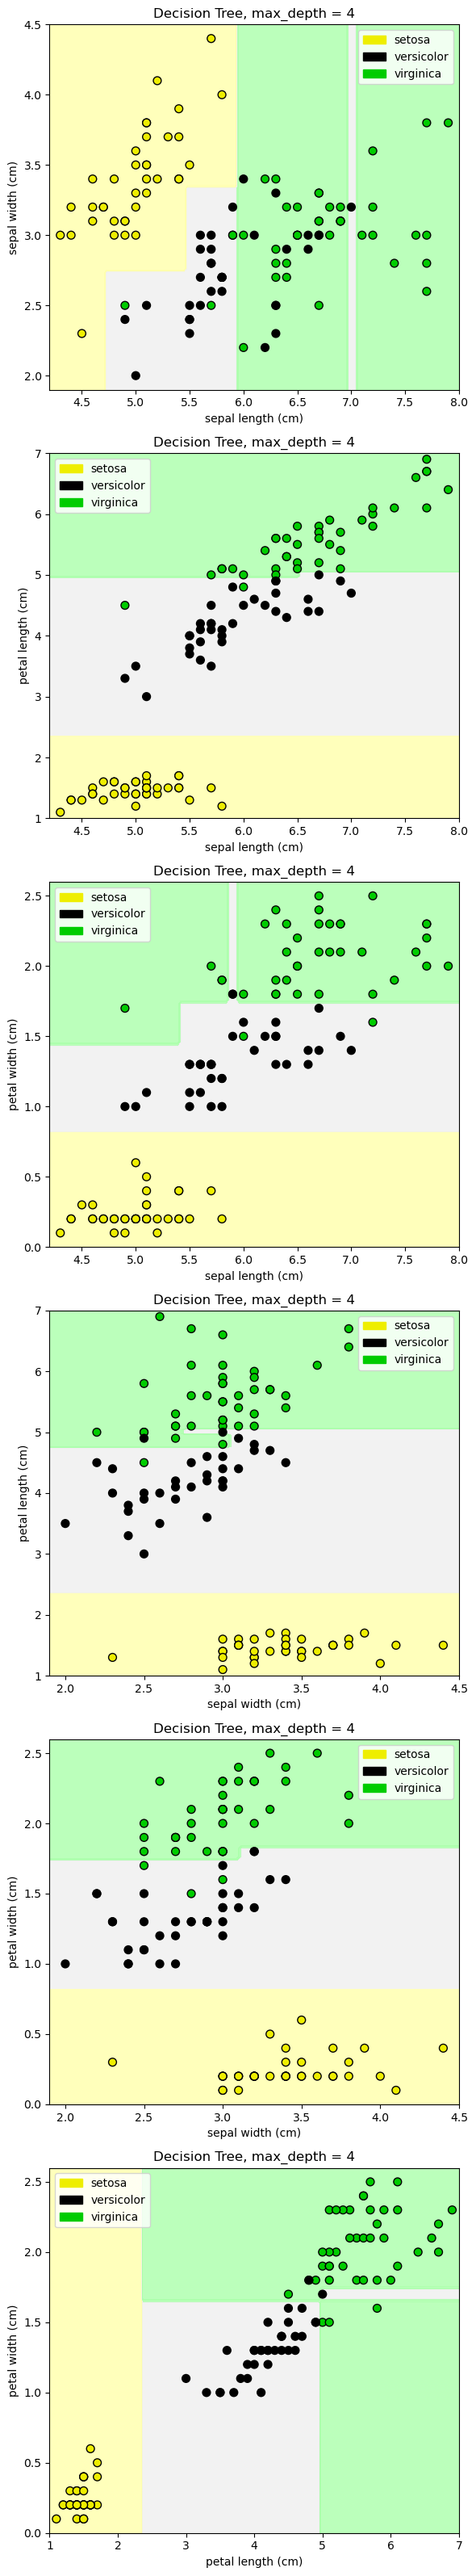

In [27]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

### Decision Trees en un dataset del mundo real

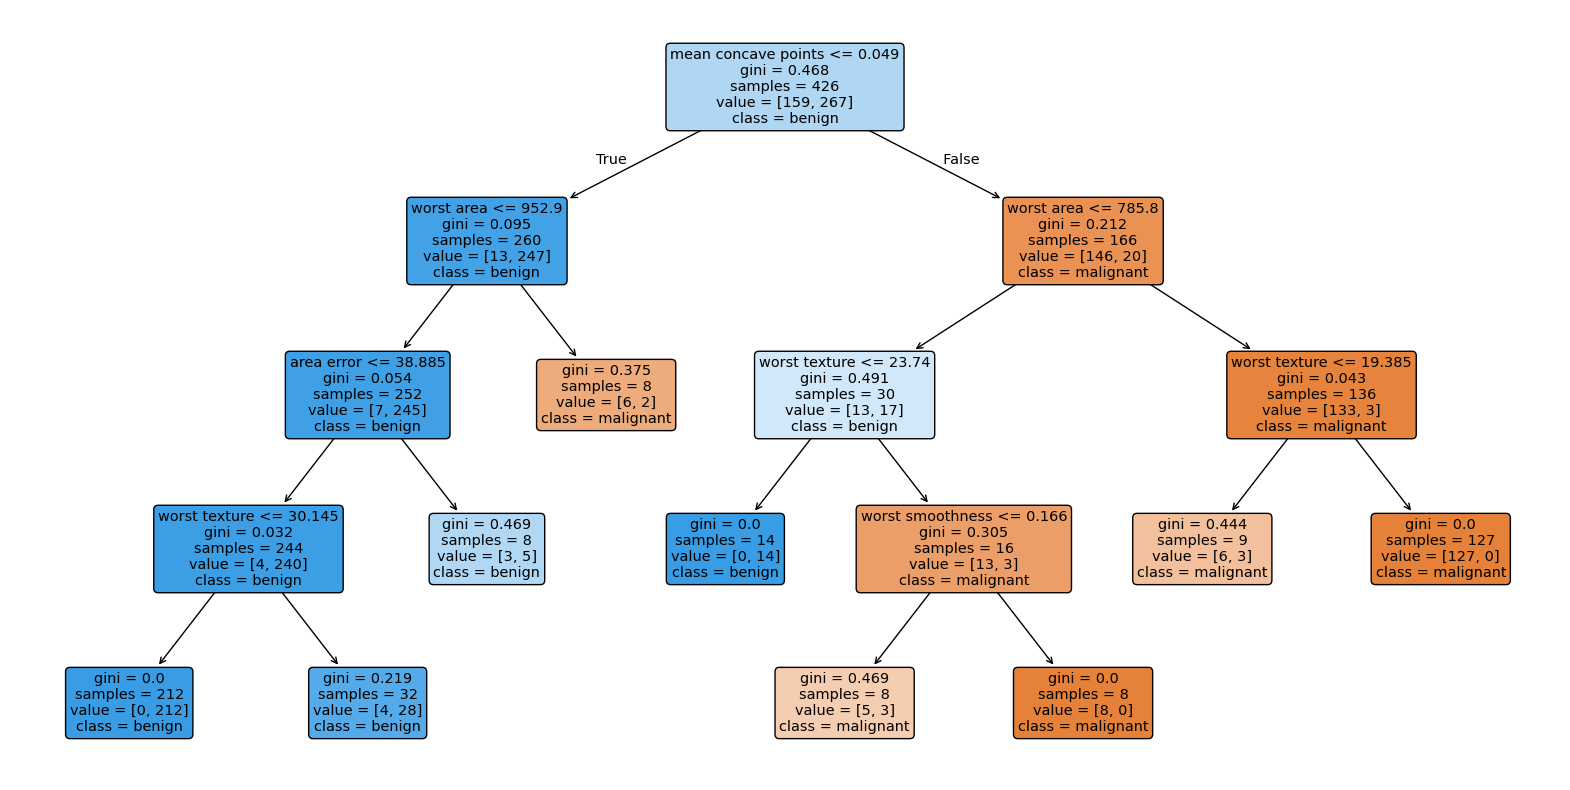

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=cancer.feature_names,
           class_names=cancer.target_names, rounded=True)
plt.show()

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


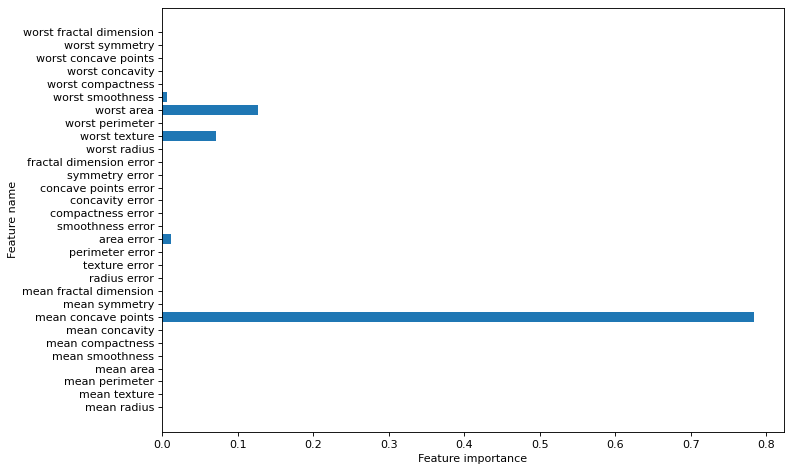

In [35]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

### ¿Afecta la normalización?

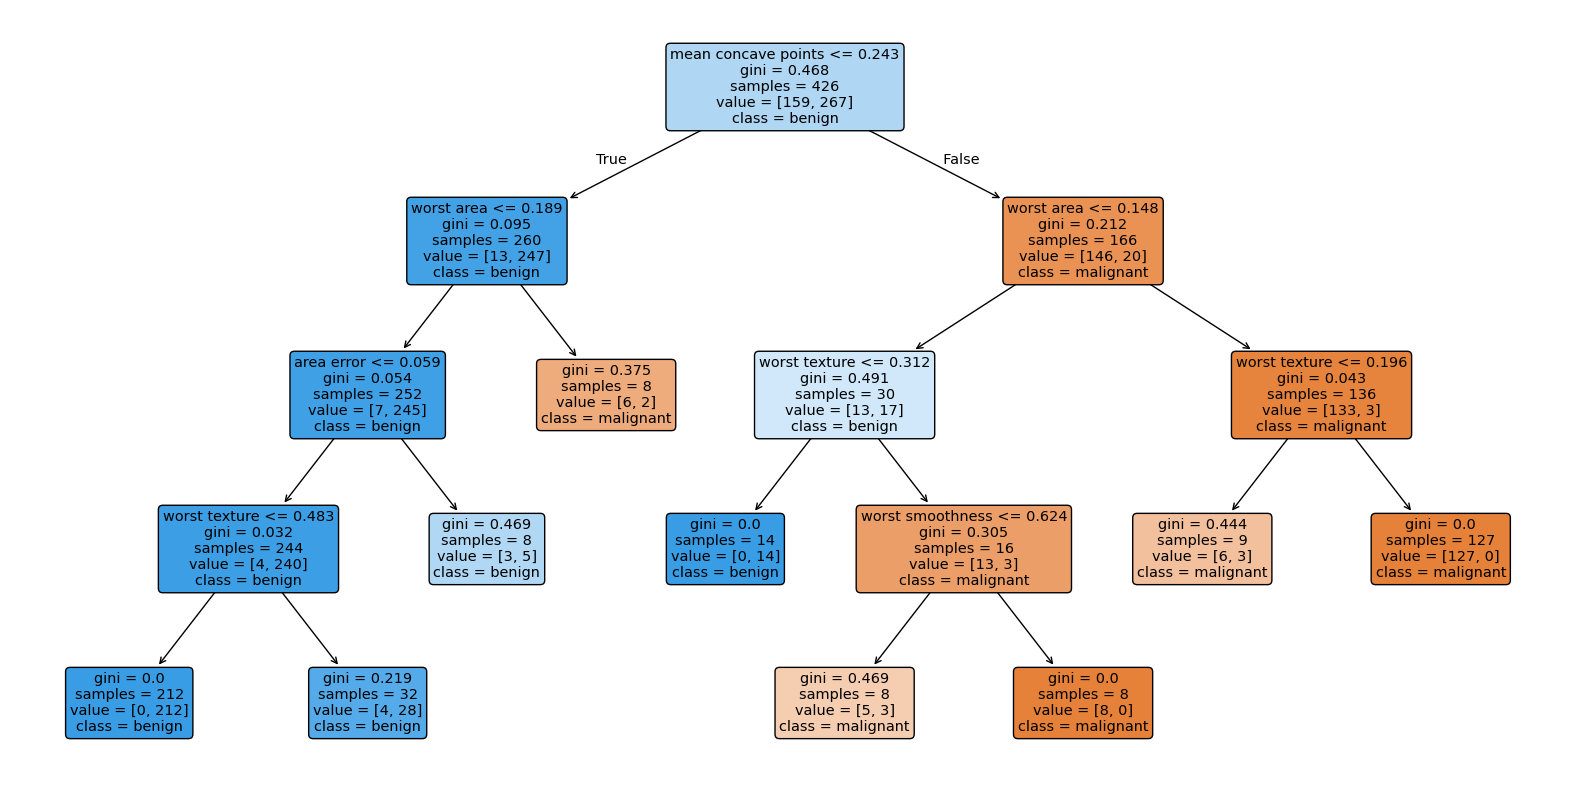

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf_norm = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train_scaled, y_train)


plt.figure(figsize=(20, 10))
plot_tree(clf_norm, filled=True, feature_names=cancer.feature_names,
           class_names=cancer.target_names, rounded=True)
plt.show()

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.63
Accuracy of DT classifier on test set: 0.63


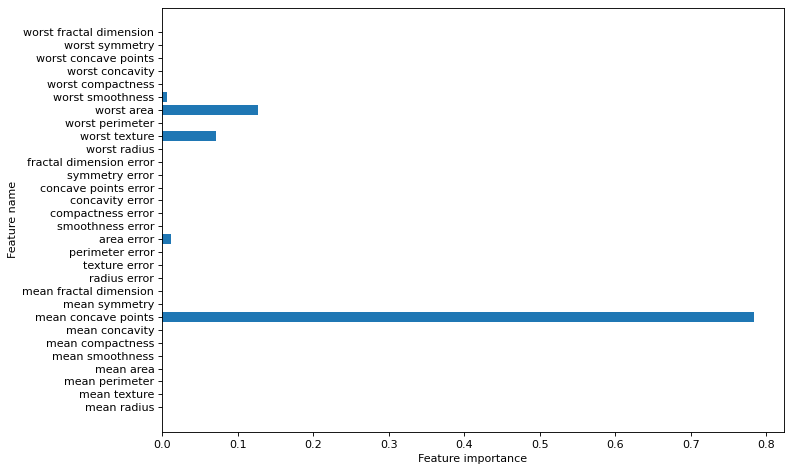

In [41]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf_norm, cancer.feature_names)
plt.tight_layout()

plt.show()

En este caso puntual el modelo empeoró, pero no necesariamente siempre pasa. En general los Decission Tree suelen requerir con menos frecuencia la normalización de los datos